In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Weighted median

In the video we have discussed that for MAPE metric the best constant prediction is [weighted median](https://en.wikipedia.org/wiki/Weighted_median) with weights

$$w_i = \frac{\sum_{j=1}^N \frac{1}{x_j}}{x_i}$$

for each object $x_i$.

This notebook exlpains how to compute weighted median. Let's generate some data first, and then find it's weighted median.

In [11]:
N = 5
x = np.random.randint(low=1, high=100, size=N)
x

array([56, 94,  4,  7, 17])

1) Compute *normalized* weights:

In [12]:
inv_x = 1.0/x
inv_x

array([ 0.01785714,  0.0106383 ,  0.25      ,  0.14285714,  0.05882353])

In [13]:
w = inv_x/sum(inv_x)
w

array([ 0.03718874,  0.02215499,  0.52064231,  0.29750989,  0.12250407])

2) Now sort the normalized weights. We will use `argsort` (and not just `sort`) since we will need indices later.

In [14]:
idxs = np.argsort(w)
sorted_w = w[idxs]
sorted_w

array([ 0.02215499,  0.03718874,  0.12250407,  0.29750989,  0.52064231])

3) Compute [cumulitive sum](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.cumsum.html) of sorted weights

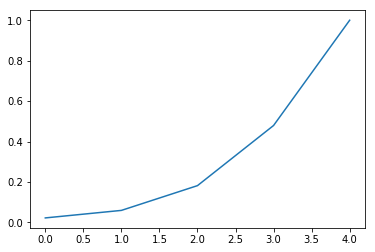

sorted_w_cumsum:  [ 0.02215499  0.05934373  0.1818478   0.47935769  1.        ]


In [15]:
sorted_w_cumsum = np.cumsum(sorted_w)
plt.plot(sorted_w_cumsum); plt.show()
print ('sorted_w_cumsum: ', sorted_w_cumsum)

4) Now find the index when cumsum hits 0.5:

In [16]:
idx = np.where(sorted_w_cumsum>0.5)[0][0]
idx

4

5) Finally, your answer is sample at that position:

In [17]:
pos = idxs[idx]
x[pos]

4

In [18]:
print('Data: ', x)
print('Sorted data: ', np.sort(x))
print('Weighted median: %d, Median: %d' %(x[pos], np.median(x)))

Data:  [56 94  4  7 17]
Sorted data:  [ 4  7 17 56 94]
Weighted median: 4, Median: 17


Thats it! 

If the procedure looks surprising for you, try to do steps 2--5 assuming the weights are $w_i=\frac{1}{N}$. That way you will find a simple median (not weighted) of the data. 